# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Con el objetivo de ayudar a los tasadores en la valuación de cierta cantidad de propiedades, aplicando desde mi área un modelo de machine learning que le permita a la inmobiliaria alcanzar un proceso eficicente y efectivo, sería necesario contar con los datos del total de las propiedades de las que dispone Properati, sumados a los datos existentes acerca de las nuevas propiedades de mi inmobiliaria a tasar. A partir del dataset de Properati, podré visualizar cada variable medible sobre el total de las propiedades, procediendo con un exhaustivo análisis exploratorio de datos (intra e intervariables). Mi tarea será hallar, una vez consumado el análisis estadístico descriptivo y gráfico de cada columna/variable del conjunto de datos, cuál es la combinación de variables ("X") que, al insertar en el modelo a crear, entregue con el menor error posible el resultado de la variable "y" a predecir. Las variables que me interesarán serán aquellas que presenten mayor grado de correlación, no entre sí, sino con la columna "y" (precio).

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
#Librerías:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
#Cargo dataset:

datos_properati = pd.read_csv('C:/Users/guido/Downloads/DS_Proyecto_01_Datos_Properati.csv')

#Cantidad de filas y columnas:

print('Filas y columnas:')
print(datos_properati.shape)

Filas y columnas:
(146660, 19)


In [3]:
#Cinco primeras instancias:

datos_properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
#Nombres de las columnas:

datos_properati.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [5]:
#Renombro columnas:

datos_properati = datos_properati.rename({'l1': 'country', 'l2': 'region', 'l3': 'neighborhood'}, axis=1)

#Valores faltantes por columna:

datos_properati.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
country                0
region                 0
neighborhood           0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [6]:
#Tipos de propiedad:

print(datos_properati.property_type.unique())

#Cantidad de tipos de propiedad:

print(datos_properati.property_type.nunique())

['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
10


In [7]:
#Cantidad de instancias por cada tipo de propiedad:

datos_properati.property_type.value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

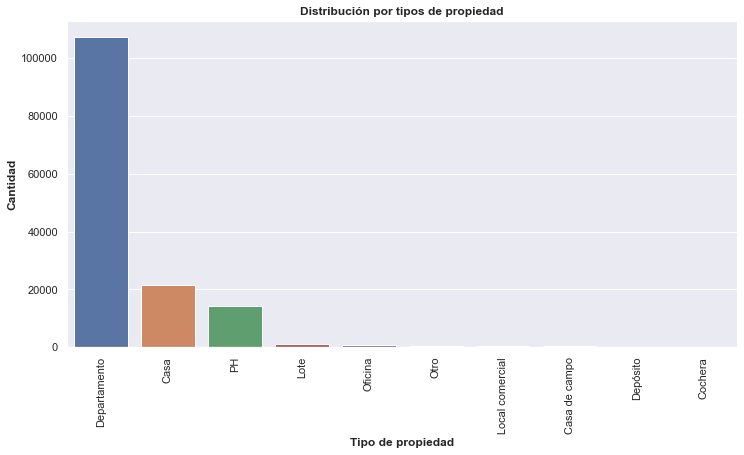

In [8]:
#Distribución de tipos de propiedad:

plt.figure(figsize=(12,6))
ax=sns.countplot(x='property_type',data=datos_properati,order=datos_properati['property_type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Tipo de propiedad',fontweight="bold")
plt.ylabel('Cantidad',fontweight="bold")
plt.title('Distribución por tipos de propiedad',fontweight="bold")
plt.show()

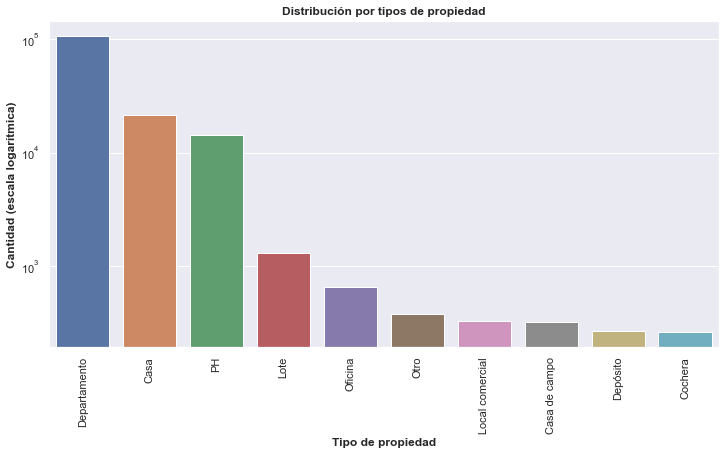

In [9]:
#Distribución de tipos de propiedad (escala logarítmica):

plt.figure(figsize=(12,6))
ax=sns.countplot(x='property_type',data=datos_properati,order=datos_properati['property_type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(yscale='log')
plt.xlabel('Tipo de propiedad',fontweight="bold")
plt.ylabel('Cantidad (escala logarítmica)',fontweight="bold")
ax.set(yscale='log')
plt.title('Distribución por tipos de propiedad',fontweight="bold")
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [10]:
#Distribución por regiones:

Regiones = datos_properati.region.value_counts()
Regiones

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: region, dtype: int64

In [11]:
#Distribución por barrios:

Barrios = datos_properati.neighborhood.value_counts()
Barrios

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: neighborhood, Length: 89, dtype: int64

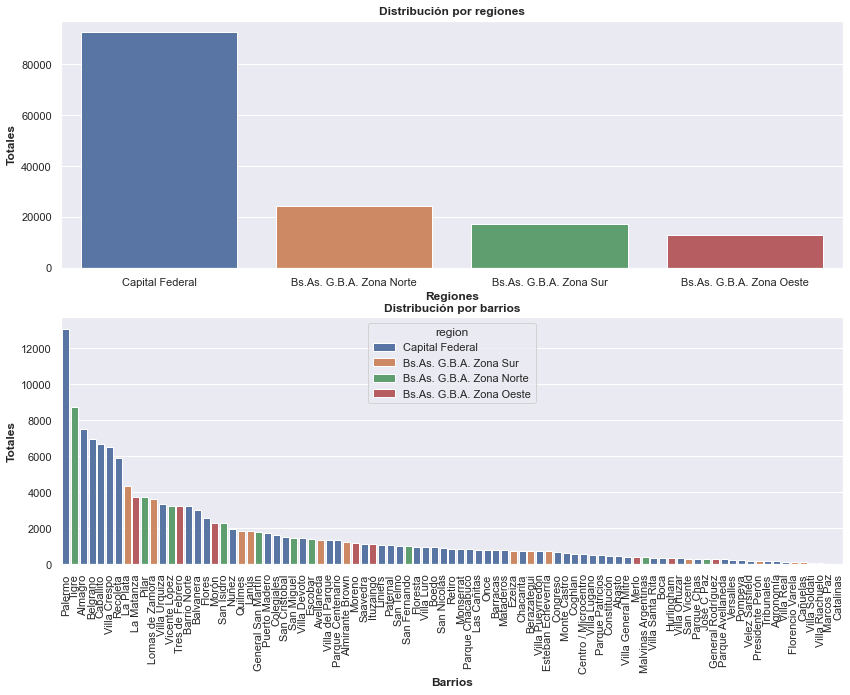

In [12]:
#Distribución por regiones y barrios:

plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
ax1=sns.countplot(x="region",data=datos_properati,order=datos_properati['region'].value_counts().index)
plt.xlabel('Regiones',fontweight="bold")
plt.ylabel('Totales',fontweight="bold")
plt.title('Distribución por regiones',fontweight="bold")

plt.subplot(2,1,2)
ax2=sns.countplot(x="neighborhood",hue="region",data=datos_properati,order=datos_properati['neighborhood'].value_counts().index,dodge=False)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90,ha="center")
plt.xlabel('Barrios',fontweight="bold")
plt.ylabel('Totales',fontweight="bold")
plt.title('Distribución por barrios',fontweight="bold")

plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [13]:
#Departamentos, casas y PH's en Capital Federal:

filtro_1 = np.logical_and(datos_properati.property_type.isin(['Departamento','Casa','PH']),datos_properati.region == 'Capital Federal')
nuevo_datos_properati = datos_properati[filtro_1]
nuevo_datos_properati.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [14]:
#Estadísticos por variable:

print('Rooms:')
print(nuevo_datos_properati.rooms.nunique())
print(nuevo_datos_properati.rooms.describe())

print('Bedrooms:')
print(nuevo_datos_properati.bedrooms.nunique())
print(nuevo_datos_properati.bedrooms.describe())

print('Bathrooms:')
print(nuevo_datos_properati.bathrooms.nunique())
print(nuevo_datos_properati.bathrooms.describe())

print('Total surface:')
print(nuevo_datos_properati.surface_total.nunique())
print(nuevo_datos_properati.surface_total.describe())

print('Covered surface:')
print(nuevo_datos_properati.surface_covered.nunique())
print(nuevo_datos_properati.surface_covered.describe())

print('Prices:')
print(nuevo_datos_properati.price.nunique())
print(nuevo_datos_properati.price.describe())

Rooms:
20
count    91485.000000
mean         2.964278
std          1.314704
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         26.000000
Name: rooms, dtype: float64
Bedrooms:
16
count    91485.000000
mean         1.960278
std          1.072946
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: bedrooms, dtype: float64
Bathrooms:
13
count    89314.000000
mean         1.560147
std          0.860309
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: bathrooms, dtype: float64
Total surface:
719
count     82568.000000
mean        112.626369
std         980.713664
min          10.000000
25%          49.000000
50%          71.000000
75%         111.000000
max      126062.000000
Name: surface_total, dtype: float64
Covered surface:
611
count     82250.000000
mean         94.966310
std         778.515243
min           1

In [15]:
#Valores atípicos leves en price:

#Q1-1.5*IQR =
print(1200000-(1.5*1590000))

#Q3+1.5*IQR =
print(2790000+(1.5*1590000))

-1185000.0
5175000.0


In [16]:
#Valores atípicos leves en surface_total:

#Q1-1.5*IQR =
print(49-(1.5*62))

#Q3+1.5*IQR = 
print(111+(1.5*62))

-44.0
204.0


_**Distribuciones por superficie total (m2) de casa, departamentos y PH**_

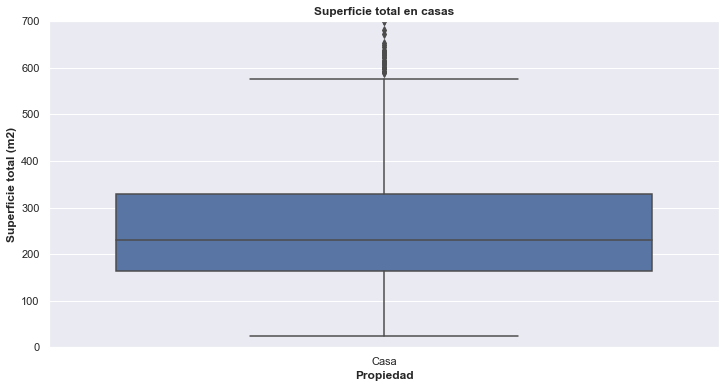

In [17]:
datos_casa = nuevo_datos_properati.property_type=='Casa'
datos_casa = nuevo_datos_properati[datos_casa]
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='property_type', y='surface_total',data=datos_casa)
plt.xlabel('Propiedad',fontweight="bold")
plt.ylabel('Superficie total (m2)',fontweight="bold")
plt.ylim(0,700)
plt.title('Superficie total en casas',fontweight="bold")
plt.show()

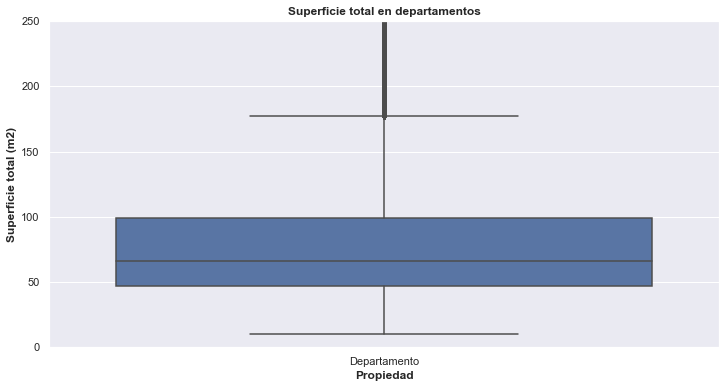

In [18]:
datos_departamento = nuevo_datos_properati.property_type=='Departamento'
datos_departamento = nuevo_datos_properati[datos_departamento]
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='property_type', y='surface_total',data=datos_departamento)
plt.xlabel('Propiedad',fontweight="bold")
plt.ylabel('Superficie total (m2)',fontweight="bold")
plt.ylim(0,250)
plt.title('Superficie total en departamentos',fontweight="bold")
plt.show()       

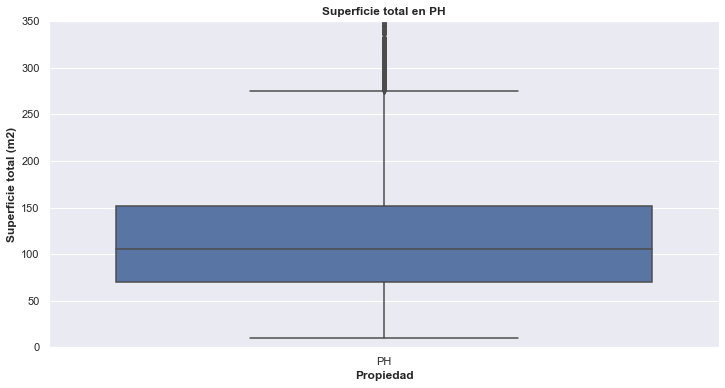

In [19]:
datos_ph = nuevo_datos_properati.property_type=='PH'
datos_ph = nuevo_datos_properati[datos_ph]
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='property_type', y='surface_total',data=datos_ph)
plt.xlabel('Propiedad',fontweight="bold")
plt.ylabel('Superficie total (m2)',fontweight="bold")
plt.ylim(0,350)
plt.title('Superficie total en PH',fontweight="bold")
plt.show()

_**Distribución por superficie total (m2) según tipo de propiedad**_

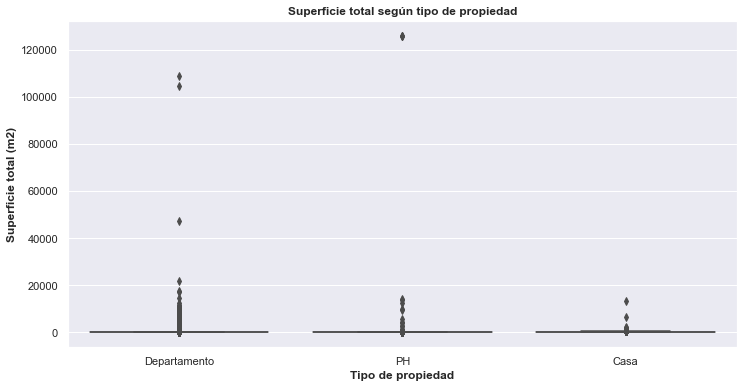

In [20]:
#Distribución de superficie total según tipo de propiedad:

plt.figure(figsize=(12,6))
ax=sns.boxplot(x='property_type', y='surface_total',data=nuevo_datos_properati)
plt.xlabel('Tipo de propiedad',fontweight="bold")
plt.ylabel('Superficie total (m2)',fontweight="bold")
plt.title('Superficie total según tipo de propiedad',fontweight="bold")
plt.show()

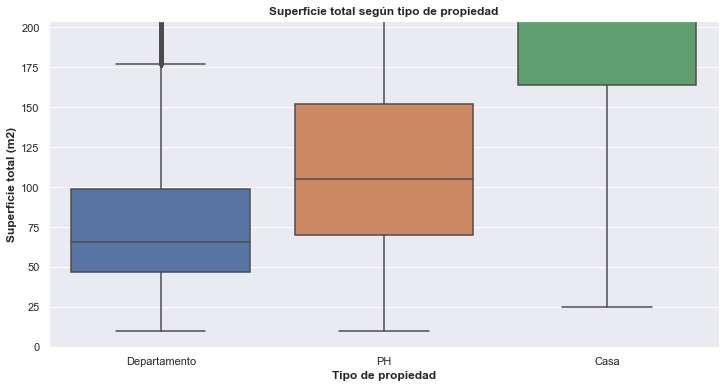

In [21]:
#Distribución de superficie total según tipo de propiedad (0-204):

plt.figure(figsize=(12,6))
ax=sns.boxplot(x='property_type', y='surface_total',data=nuevo_datos_properati)
plt.xlabel('Tipo de propiedad',fontweight="bold")
plt.ylabel('Superficie total (m2)',fontweight="bold")
plt.ylim(0,204)
plt.title('Superficie total según tipo de propiedad',fontweight="bold")
plt.show()

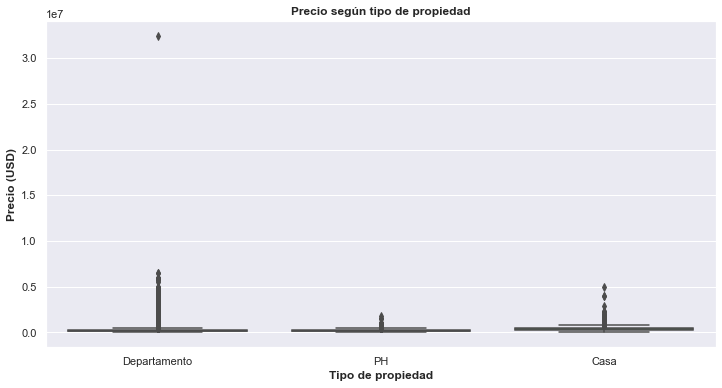

In [22]:
#Distribución de precio según tipo de propiedad:

plt.figure(figsize=(12,6))
ax=sns.boxplot(x='property_type', y='price',data=nuevo_datos_properati)
plt.xlabel('Tipo de propiedad',fontweight="bold")
plt.ylabel('Precio (USD)',fontweight="bold")
plt.title('Precio según tipo de propiedad',fontweight="bold")
plt.show()

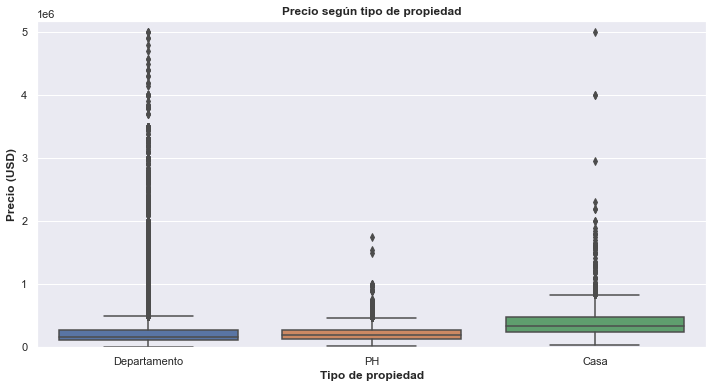

In [23]:
#Distribución de precio según tipo de propiedad(0-5.175.000):

plt.figure(figsize=(12,6))
ax=sns.boxplot(x='property_type', y='price',data=nuevo_datos_properati)
plt.xlabel('Tipo de propiedad',fontweight="bold")
plt.ylabel('Precio (USD)',fontweight="bold")
plt.ylim(0,5175000)
plt.title('Precio según tipo de propiedad',fontweight="bold")
plt.show()

In [24]:
#Filtro según superficie total, superficie cubierta y precio:
#Superficie total y precio no presentan valores atípicos con respecto al primer cuartil, ya que el cálculo muestra resultados negativos.

nuevo_datos_properati_2 = nuevo_datos_properati[nuevo_datos_properati.surface_total<204]

nuevo_datos_properati_2 = nuevo_datos_properati_2[nuevo_datos_properati_2.surface_covered<nuevo_datos_properati_2.surface_total]

nuevo_datos_properati_2 = nuevo_datos_properati_2[nuevo_datos_properati_2.surface_total>0]

nuevo_datos_properati_2 = nuevo_datos_properati_2[nuevo_datos_properati_2.surface_covered>0]

nuevo_datos_properati_2 = nuevo_datos_properati_2[nuevo_datos_properati_2.price<5175000]

nuevo_datos_properati_2 = nuevo_datos_properati_2[nuevo_datos_properati_2.price>0]

nuevo_datos_properati_2.shape

(51996, 19)

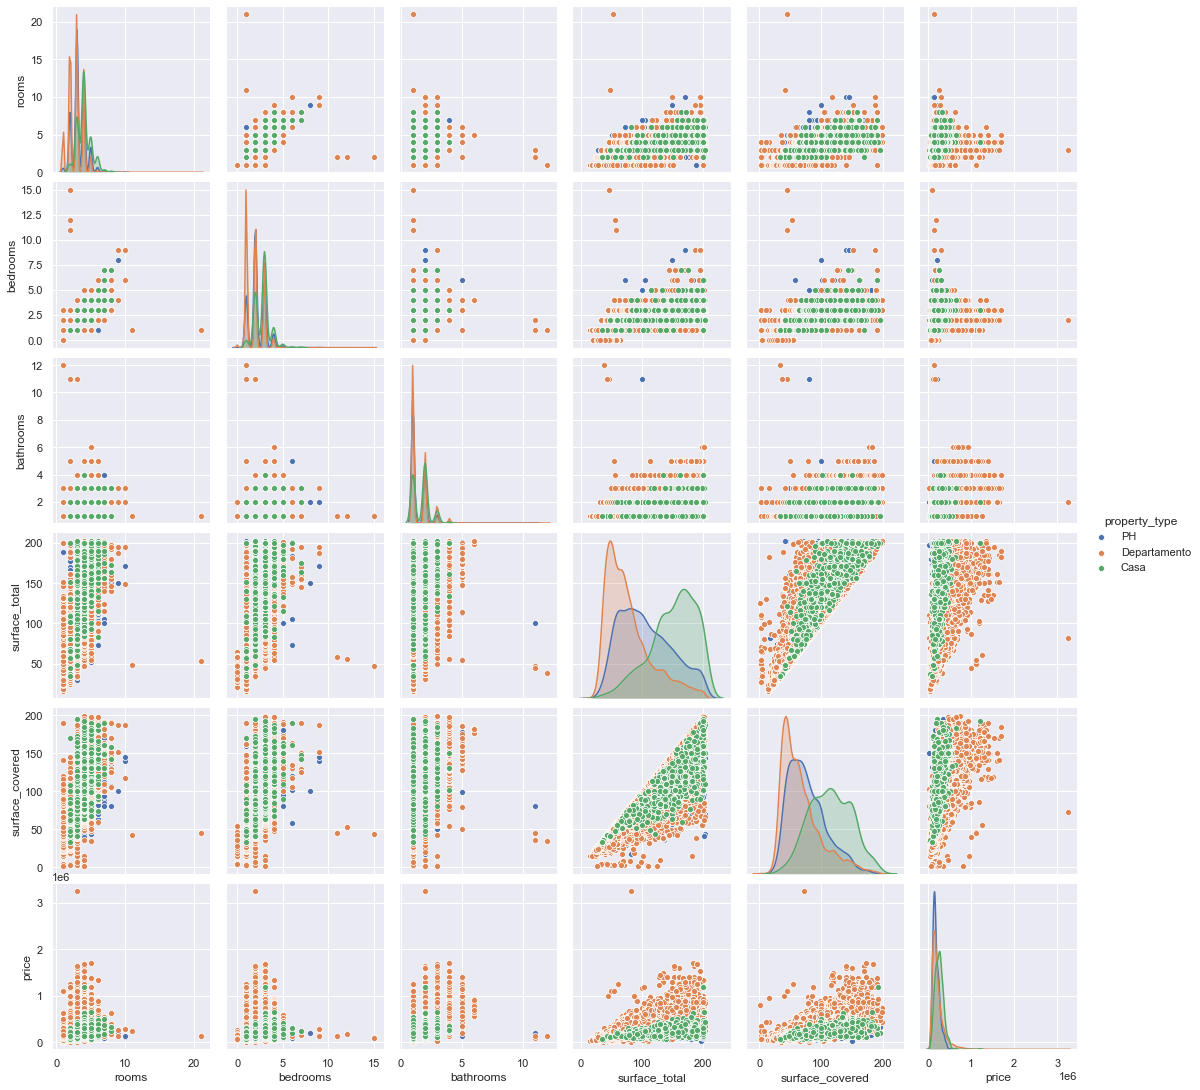

In [25]:
#Gráfico de a pares:

sns.pairplot(nuevo_datos_properati_2[['property_type','rooms','bedrooms','bathrooms','surface_total','surface_covered','price']],hue='property_type')

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

<function matplotlib.pyplot.show(*args, **kw)>

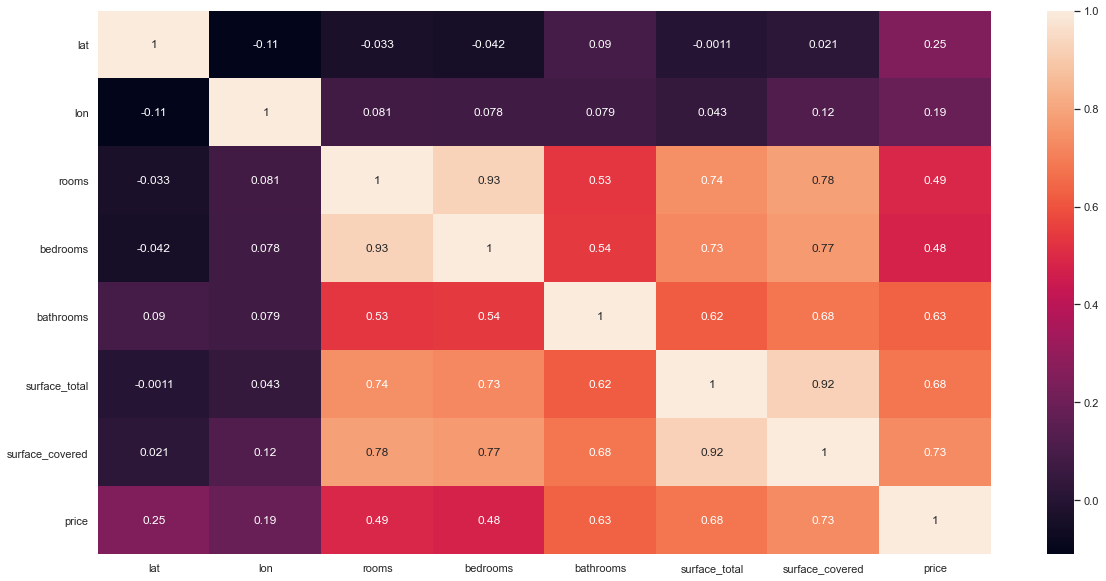

In [26]:
#Mapa de calor:

plt.figure(figsize=(20,10))
correlación = nuevo_datos_properati_2.corr()
sns.heatmap(correlación,annot=True)
plt.show

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

_**- Indago los datos sobre las tres regiones de la provincia de Buenos Aires:**_

In [27]:
bsas_zona_norte = np.logical_and(datos_properati.property_type.isin(['Departamento','Casa','PH']),datos_properati.region == 'Bs.As. G.B.A. Zona Norte')
bsas_zona_norte = datos_properati[bsas_zona_norte]
print(bsas_zona_norte.neighborhood.value_counts())
print(bsas_zona_norte.property_type.value_counts())
print(bsas_zona_norte.price.describe())

Tigre                  8636
Pilar                  3560
Vicente López          3176
San Isidro             2225
General San Martín     1744
San Miguel             1427
Escobar                1317
San Fernando            987
Malvinas Argentinas     348
José C Paz              277
Name: neighborhood, dtype: int64
Departamento    15668
Casa             6439
PH               1590
Name: property_type, dtype: int64
count    2.369700e+04
mean     2.371207e+05
std      2.046258e+05
min      1.232200e+04
25%      1.250000e+05
50%      1.850000e+05
75%      2.850000e+05
max      3.600000e+06
Name: price, dtype: float64


In [28]:
bsas_zona_sur = np.logical_and(datos_properati.property_type.isin(['Departamento','Casa','PH']),datos_properati.region == 'Bs.As. G.B.A. Zona Sur')
bsas_zona_sur = datos_properati[bsas_zona_sur]
print(bsas_zona_sur.neighborhood.value_counts())
print(bsas_zona_sur.property_type.value_counts())
print(bsas_zona_sur.price.describe())

La Plata              4247
Lomas de Zamora       3160
Quilmes               1807
Lanús                 1739
Avellaneda            1350
Almirante Brown       1034
Berazategui            672
Esteban Echeverría     641
Ezeiza                 597
San Vicente            210
Presidente Perón       147
Florencio Varela       134
Cañuelas                76
Name: neighborhood, dtype: int64
Casa            7377
Departamento    7041
PH              1396
Name: property_type, dtype: int64
count    1.581400e+04
mean     1.800919e+05
std      1.828931e+05
min      1.300000e+04
25%      8.700000e+04
50%      1.300000e+05
75%      2.069280e+05
max      7.716649e+06
Name: price, dtype: float64


In [29]:
bsas_zona_oeste = np.logical_and(datos_properati.property_type.isin(['Departamento','Casa','PH']),datos_properati.region == 'Bs.As. G.B.A. Zona Oeste')
bsas_zona_oeste = datos_properati[bsas_zona_oeste]
print(bsas_zona_oeste.neighborhood.value_counts())
print(bsas_zona_oeste.property_type.value_counts())
print(bsas_zona_oeste.price.describe())

La Matanza           3669
Tres de Febrero      3160
Morón                2285
Moreno               1052
Ituzaingó            1030
Merlo                 384
Hurlingham            321
General Rodríguez     221
Marcos Paz             27
Name: neighborhood, dtype: int64
Departamento    5588
Casa            5013
PH              1548
Name: property_type, dtype: int64
count    1.214900e+04
mean     1.510502e+05
std      2.351667e+05
min      7.500000e+03
25%      7.800000e+04
50%      1.100000e+05
75%      1.700000e+05
max      1.111111e+07
Name: price, dtype: float64


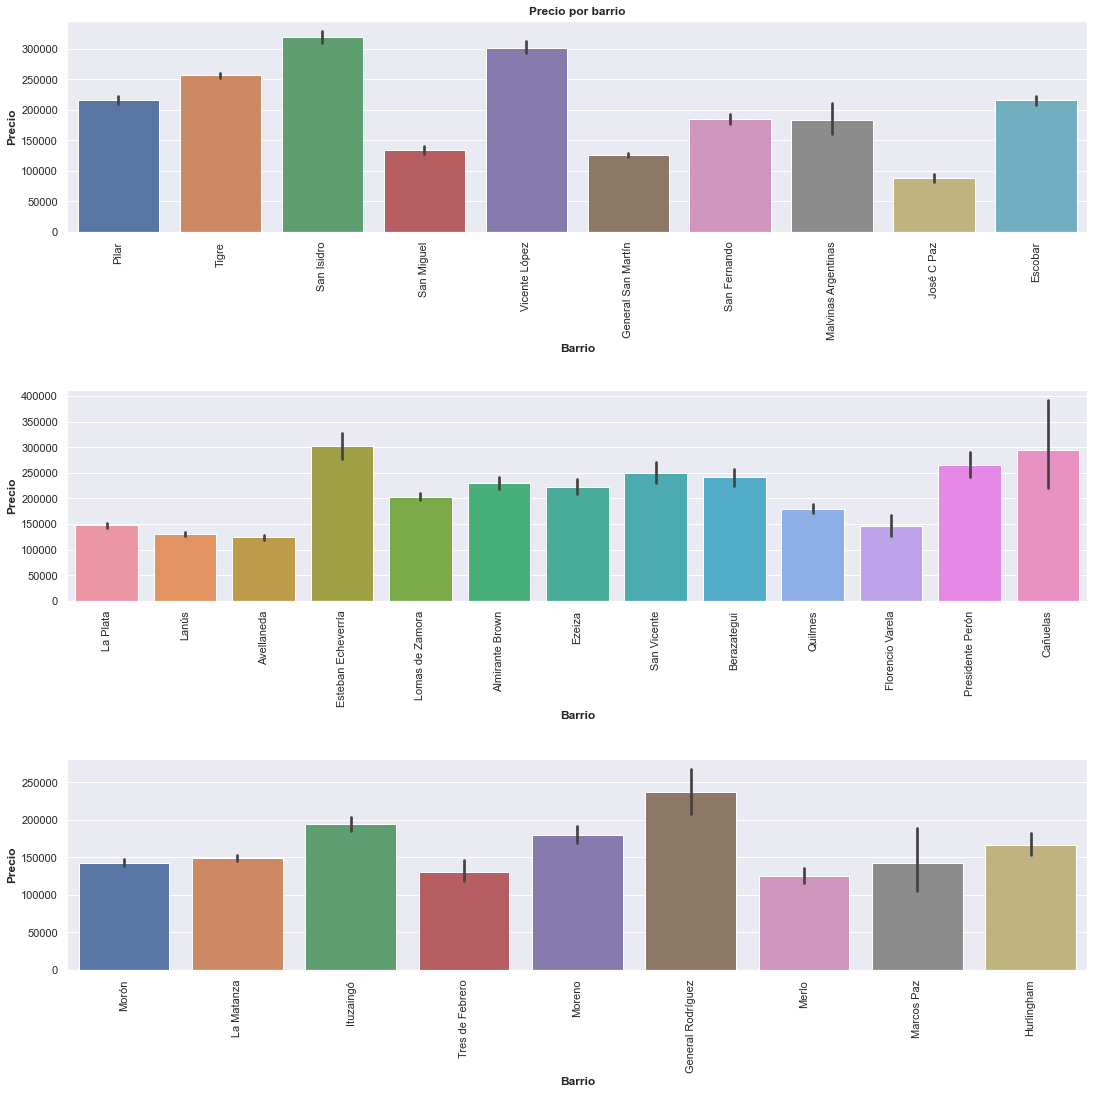

In [30]:
#Precios de departamentos,casas y PH en los barrios de las tres regiones de la provincia de Buenos Aires:

plt.figure(figsize=(16,16))

plt.subplot(3,1,1)
ax1=sns.barplot(x='neighborhood', y='price',data=bsas_zona_norte)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90,ha="center")
plt.xlabel('Barrio',fontweight="bold")
plt.ylabel('Precio',fontweight="bold")
plt.title('Precio por barrio',fontweight="bold")

plt.subplot(3,1,2)
ax2=sns.barplot(x='neighborhood', y='price',data=bsas_zona_sur)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90,ha="center")
plt.xlabel('Barrio',fontweight="bold")
plt.ylabel('Precio',fontweight="bold")

plt.subplot(3,1,3)
ax3=sns.barplot(x='neighborhood', y='price',data=bsas_zona_oeste)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90,ha="center")
plt.xlabel('Barrio',fontweight="bold")
plt.ylabel('Precio',fontweight="bold")

plt.tight_layout(pad=3.0)
plt.show()

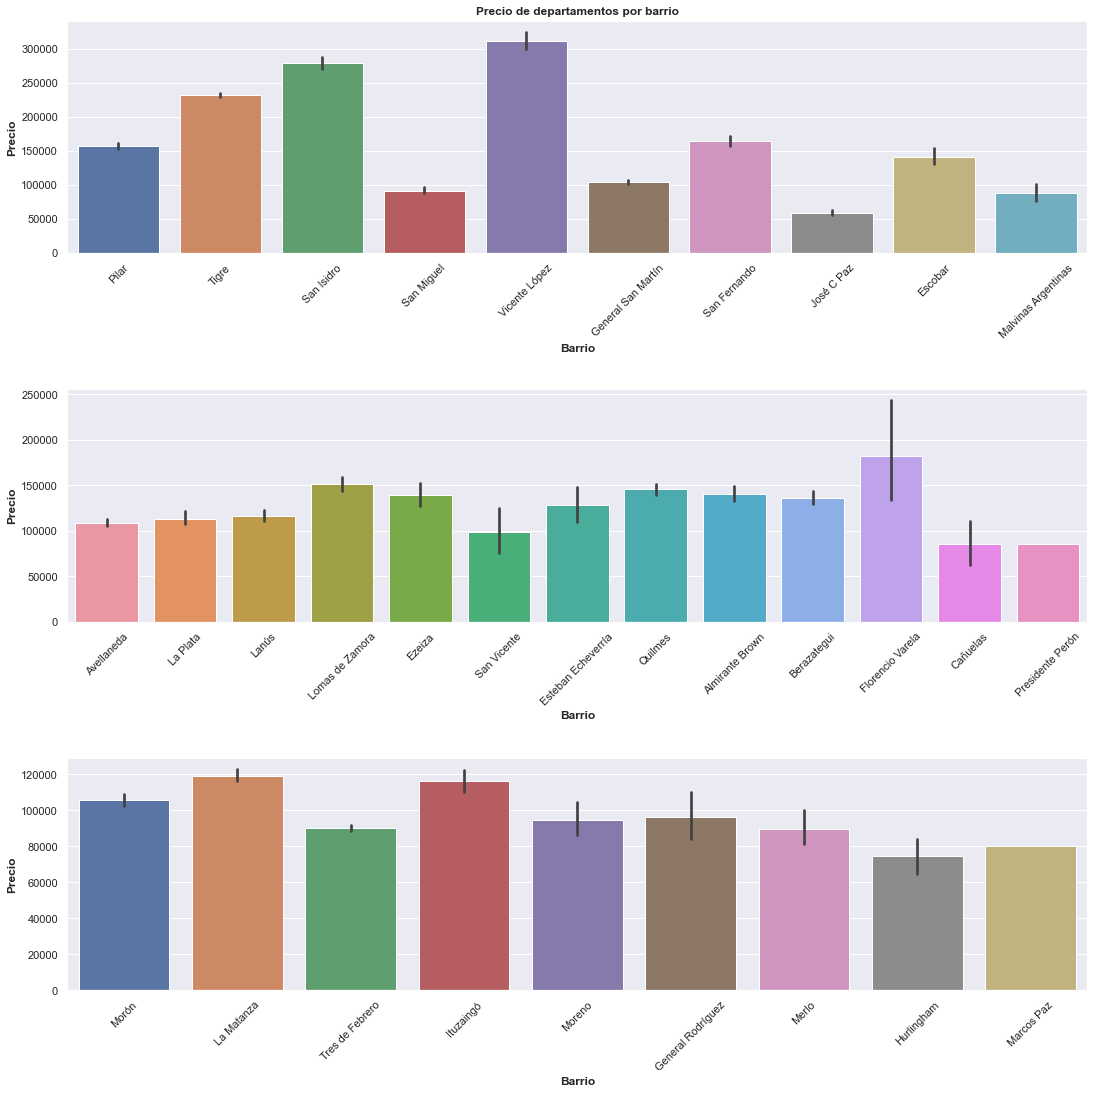

In [31]:
#Precios de departamentos en los barrios de las tres regiones de la provincia de Buenos Aires:

departamento_norte = bsas_zona_norte.property_type=='Departamento'
departamento_norte = bsas_zona_norte[departamento_norte]

departamento_sur = bsas_zona_sur.property_type=='Departamento'
departamento_sur = bsas_zona_sur[departamento_sur]

departamento_oeste = bsas_zona_oeste.property_type=='Departamento'
departamento_oeste = bsas_zona_oeste[departamento_oeste]

plt.figure(figsize=(16,16))

plt.subplot(3,1,1)
ax1=sns.barplot(x='neighborhood', y='price',data=departamento_norte)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45,ha="center")
plt.xlabel('Barrio',fontweight="bold")
plt.ylabel('Precio',fontweight="bold")
plt.title('Precio de departamentos por barrio',fontweight="bold")

plt.subplot(3,1,2)
ax2=sns.barplot(x='neighborhood', y='price',data=departamento_sur)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45,ha="center")
plt.xlabel('Barrio',fontweight="bold")
plt.ylabel('Precio',fontweight="bold")

plt.subplot(3,1,3)
ax3=sns.barplot(x='neighborhood', y='price',data=departamento_oeste)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45,ha="center")
plt.xlabel('Barrio',fontweight="bold")
plt.ylabel('Precio',fontweight="bold")

plt.tight_layout(pad=3.0)
plt.show()

In [32]:
barrio_más_caro_norte = np.logical_and(datos_properati.property_type.isin(['Departamento','Casa','PH']),datos_properati.neighborhood == 'San Isidro')
barrio_más_caro_norte = datos_properati[barrio_más_caro_norte]
print(barrio_más_caro_norte.price.describe())
media_precios_norte = np.mean(barrio_más_caro_norte.price)
print(f'Media de precios de departamentos, casas y PH del barrio más caro de zona norte: {media_precios_norte}')

barrio_más_caro_sur = np.logical_and(datos_properati.property_type.isin(['Departamento','Casa','PH']),datos_properati.neighborhood == 'Esteban Echeverría')
barrio_más_caro_sur = datos_properati[barrio_más_caro_sur]
print(barrio_más_caro_sur.price.describe())
media_precios_sur = np.mean(barrio_más_caro_sur.price)
print(f'Media de precios de departamentos, casas y PH del barrio más caro de zona sur: {media_precios_sur}')

barrio_más_caro_oeste = np.logical_and(datos_properati.property_type.isin(['Departamento','Casa','PH']),datos_properati.neighborhood == 'General Rodríguez')
barrio_más_caro_oeste = datos_properati[barrio_más_caro_oeste]
print(barrio_más_caro_oeste.price.describe())
media_precios_oeste = np.mean(barrio_más_caro_oeste.price)
print(f'Media de precios de departamentos, casas y PH del barrio más caro de zona oeste: {media_precios_oeste}')

count    2.225000e+03
mean     3.187073e+05
std      2.457377e+05
min      2.500000e+04
25%      1.830000e+05
50%      2.600000e+05
75%      3.700000e+05
max      2.950000e+06
Name: price, dtype: float64
Media de precios de departamentos, casas y PH del barrio más caro de zona norte: 318707.27730337076
count    6.410000e+02
mean     3.027089e+05
std      3.219838e+05
min      2.000000e+04
25%      1.151000e+05
50%      1.950000e+05
75%      3.350000e+05
max      1.900000e+06
Name: price, dtype: float64
Media de precios de departamentos, casas y PH del barrio más caro de zona sur: 302708.8502340094
count    2.210000e+02
mean     2.367800e+05
std      2.307087e+05
min      1.500000e+04
25%      7.990000e+04
50%      1.620000e+05
75%      2.960000e+05
max      1.500000e+06
Name: price, dtype: float64
Media de precios de departamentos, casas y PH del barrio más caro de zona oeste: 236779.99547511313


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [33]:
#Vuelvo a cargar los datos:

data = pd.read_csv('C:/Users/guido/Downloads/DS_Proyecto_01_Datos_Properati.csv')

#1
data = data[(data.l2=='Capital Federal') & (data.property_type.isin(['PH','Casa','Departamento']))]

#2
data = data[(data.surface_total<=1000) & (data.surface_total>=15)]

#3
data = data[data.price<=4000000]

#4
data = data[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

#5
data = data.dropna()

#Chequeo data:
print(data.shape)
print(data.head())

(81019, 6)
   rooms  bedrooms  bathrooms  surface_total  surface_covered     price
0    7.0       7.0        2.0          140.0            140.0  153000.0
1    2.0       1.0        2.0           70.0             58.0  159000.0
2    2.0       1.0        1.0           45.0             45.0  125000.0
3    2.0       1.0        1.0           85.0             50.0  295000.0
5    2.0       1.0        1.0           56.0             56.0  150000.0


In [34]:
#Mido correlación entre variables:

data.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

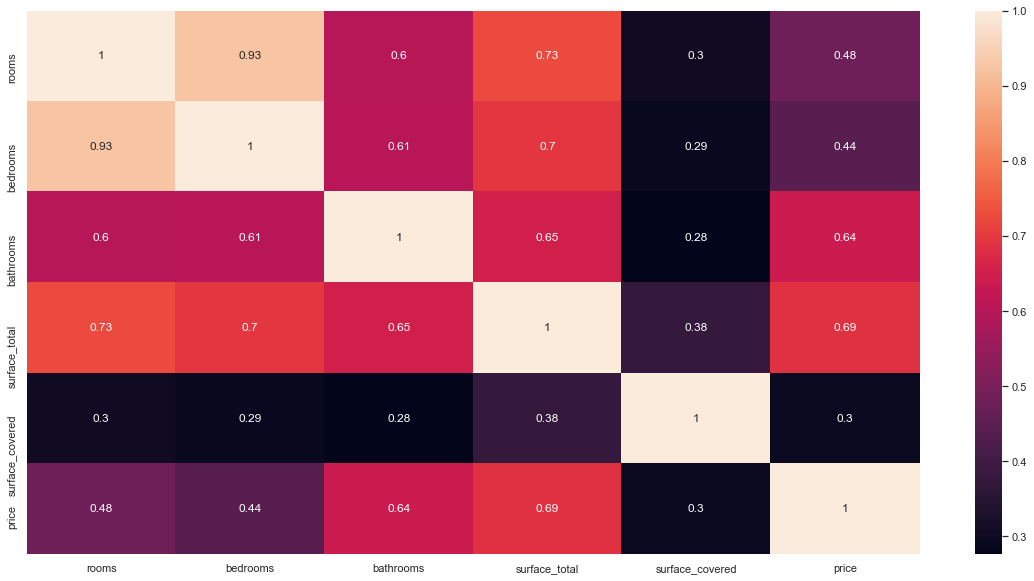

In [35]:
#Grafico correlación entre variables:

plt.figure(figsize=(20,10))
correlación_variables = data.corr()
sns.heatmap(correlación_variables,annot=True)
plt.show

**Elijo como variables predictoras: 'surface_total', 'rooms' y 'bathrooms':**

In [36]:
#X:

X = data[['bathrooms','surface_total','rooms']]
X.shape

(81019, 3)

In [37]:
#y:

y = data.price
y.shape

(81019,)

**Divido el dataset entre train (70%) y test (30%):** 

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(56713, 3) (24306, 3) (56713,) (24306,)


**Importo modelos de árbol regresor, vecinos más cercanos regresor y estadístico de evaluación (MSE):**

In [39]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

**Genero un modelo benchmark y lo evalúo:**

In [40]:
benchmark_y_train_pred = np.full((y_train.shape),np.mean(y_train))

In [41]:
benchmark_y_train_pred.shape

(56713,)

In [42]:
benchmark_train = np.sqrt(mean_squared_error(y_train, benchmark_y_train_pred))

In [43]:
benchmark_y_test_pred = np.full((y_test.shape),np.mean(y_test))

In [44]:
benchmark_y_test_pred.shape

(24306,)

In [45]:
benchmark_test = np.sqrt(mean_squared_error(y_test, benchmark_y_test_pred))

In [46]:
print('Raíz del error cuadrático medio del Benchmark (train):')
print(benchmark_train)
print('Raíz del error cuadrático medio del Benchmark (test):')
print(benchmark_test)

Raíz del error cuadrático medio del Benchmark (train):
297502.6815838595
Raíz del error cuadrático medio del Benchmark (test):
302293.37469186354


**Creo objetos de árbol regresor y vecinos más cercanos con hiperparámetros iniciales:**

In [47]:
arbol_regresor = DecisionTreeRegressor(max_depth=5, random_state=42)

knn_regresor = KNeighborsRegressor(n_neighbors=5)

**Entreno ambos modelos:**

In [48]:
arbol_regresor.fit(X_train, y_train)

knn_regresor.fit(X_train, y_train)

KNeighborsRegressor()

**Grafico raíz del error cuadrático medio para ambos modelos con sus hiperparámetros iniciales:**

Modelo: Arbol de decisión
Raíz del error cuadrático medio en Train: 182656.335498715
Raíz del error cuadrático medio en Test: 186986.27096500547


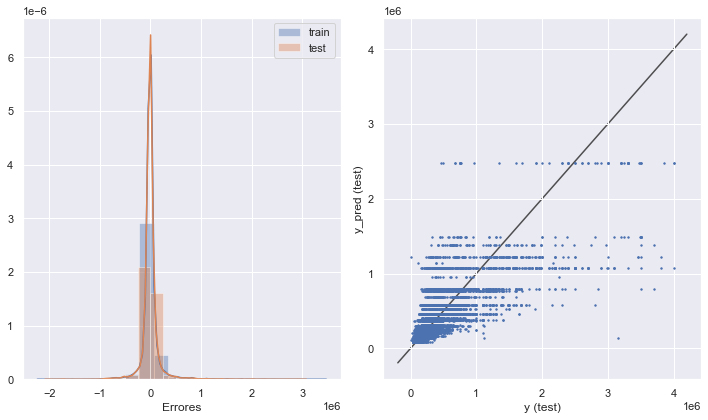

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 143164.97234215718
Raíz del error cuadrático medio en Test: 171213.52019118716


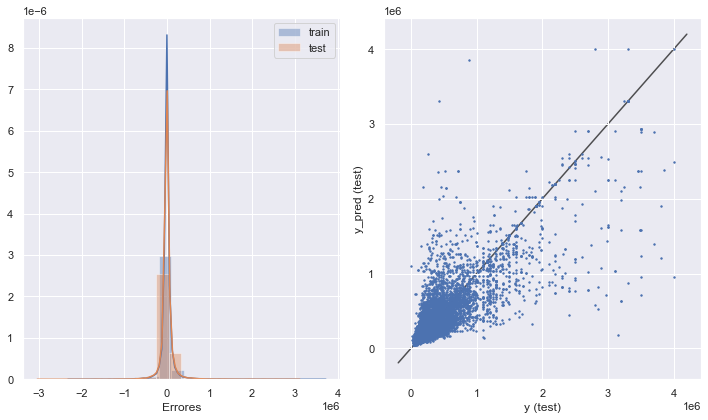

In [49]:
modelos = ['Arbol de decisión', 'Vecinos más cercanos']

for i, model in enumerate([arbol_regresor, knn_regresor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Gráfico relación entre número de vecinos (hiperparámetro) y RMSE:**

In [50]:
lista_rmse_train_k = []
lista_rmse_test_k = []

k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    clf = KNeighborsRegressor(n_neighbors=k)
    clf.fit(X_train,y_train)
    y_train_pred = clf.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = clf.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train_k.append(train_rmse)
    lista_rmse_test_k.append(test_rmse)

Text(0, 0.5, 'RMSE')

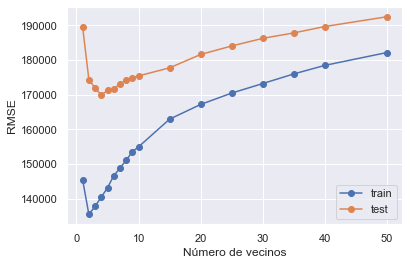

In [51]:
plt.plot(k_vecinos,lista_rmse_train_k,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test_k,'o-',label='test')
plt.legend()
plt.xlabel('Número de vecinos')
plt.ylabel('RMSE')

**Gráfico relación entre profundidad del árbol (hiperparámetro) y RMSE:**

In [52]:
lista_rmse_train_arbol = []
lista_rmse_test_arbol = []

max_depths = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for max_depth in max_depths:
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = clf.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train_arbol.append(train_rmse)
    lista_rmse_test_arbol.append(test_rmse)

Text(0, 0.5, 'RMSE')

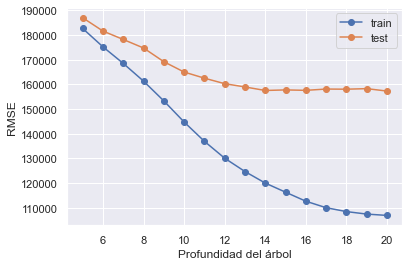

In [53]:
plt.plot(max_depths,lista_rmse_train_arbol,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test_arbol,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')

**Creo nuevos objetos de árbol regresor y vecinos más cercanos con hiperparámetros optimizados:**

In [54]:
arbol_regresor_2 = DecisionTreeRegressor(max_depth=12, random_state=42)

knn_regresor_2 = KNeighborsRegressor(n_neighbors=8)

**Entreno ambos modelos:**

In [55]:
arbol_regresor_2.fit(X_train, y_train)

knn_regresor_2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

**Grafico raíz del error cuadrático medio para ambos modelos con sus hiperparámetros optimizados:**

Modelo: Arbol de decisión optimizado
Raíz del error cuadrático medio en Train: 130099.2627181093
Raíz del error cuadrático medio en Test: 160282.26063715474


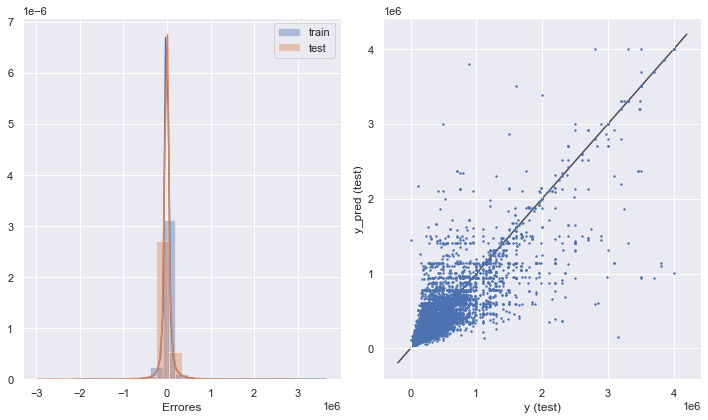

Modelo: Vecinos más cercanos optimizado
Raíz del error cuadrático medio en Train: 151092.61719411868
Raíz del error cuadrático medio en Test: 174179.81197537805


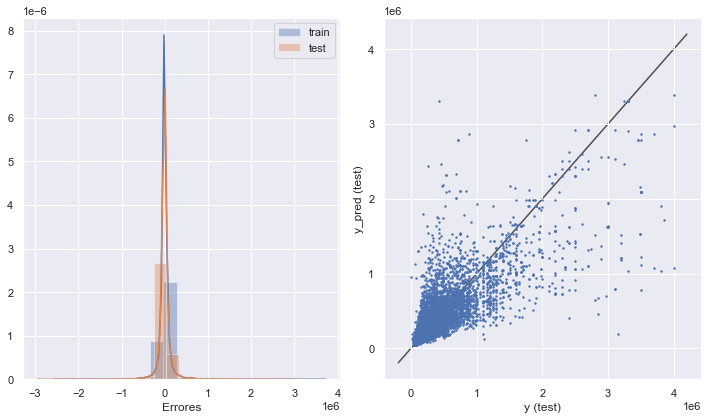

In [56]:
modelos_2 = ['Arbol de decisión optimizado', 'Vecinos más cercanos optimizado']

for i, model in enumerate([arbol_regresor_2, knn_regresor_2]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos_2[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [57]:
#r2_Score (otra métrica alternativa):

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7420683010775766
0.667999775832037


**CONSIDERACIONES FINALES:**

*- En primer lugar, optaría por el modelo de árbol de decisión (regresor), ya que al alcanzar la optimización de sendos modelos incluidos en la problemática abordada fue el árbol el que arrojó un menor nivel de error tras ser evaluado por el estadístico pertinente -en este caso, la raíz del error cuadrático medio (RMSE). El modelo del árbol dio poco más de 130.000 en train y alrededor de 160.000 en test; mientras que, por su parte, vecinos más cercanos dio cerca de 150.000 en train y casi 175.000 en test*.

*- Para agregar, se percibe un dataset desbalanceado en algunas de sus variables preponderantes. Tal es el caso de tipos de propiedad, teniendo en cuenta que existen cinco veces más datos sobre departamentos que sobre casas, siendo estos los dos tipo de propiedad más repetidos en el conjunto de datos analizado. Algo similar ocurre con la columna de regiones: Capital Federal es la más veces repetidas, y las otras tres regiones detectadas en el dataset -sumando todas sus instancias- ni siquiera alcanzan la mitad de los datos de Capital Federal. Creo que se podría llegar a modelos de aprendizaje automático más eficaces al aplicar uno por cada uno de los tres tipos de propiedad más repetidos (departamento, casa y PH) en la región de Capital Federal. También podrían ser investigados los datos sobre el resto de las regiones en conjunto, habida cuenta de que todas pertenecen a la provincia de Buenos Aires. De esa forma, podría compararse el nivel de precios entre los dos distritos más poblados de Argentina: CABA y BS. AS..*